In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb
import copy
import time
from astropy import units as u
from astropy.constants import G
from astropy.io import ascii
from matplotlib import gridspec

% matplotlib inline

<img src="files/bonfils_table.png" style="width: 700px;">

In [10]:
print 4/(92.18+88.54+81.51+53.77)

0.0126582278481


## Goal: Get occurrence rates of RV-detectable planets around M-dwarfs from Bonfils et al. 2013: https://arxiv.org/abs/1111.5019

### These are planets in various P, M bins orbiting M-dwarfs within 11pc of the Sun (with declination $\delta < 20^{\circ}$, so the volume in question is $1.12*10^4 pc^3$).

| Mass range [(M*sini)/M_earth] | Summing over all period ranges | Occurrence rate  |
|-------------------------------|-----------------------------|---------------------|
| 1-10                          | 8/(13.97+5.79+1.53+0.003)   | 0.376               |
| 10-100                        | 2/(69.76+51.96+30.75+9.47)  | 0.012               |
| 100-1000                      | 4/(92.18+88.54+81.51+53.77) | 0.013               |
| 1000-10,000                   | 0/(96.83+95.83+94.29+87.99) | 0.01 (upper limit)  |

### These fractions take the form:
$f = \frac{N_{detections}}{N_{stars\ around\ which\ we\ could\ detect\ such\ planets}}$

so to convert to our desired units, we need to divide by the mass range in each bin, then multiply by the number density of M-dwarfs in the solar neighborhood, which $=\frac{102}{1.12*10^4 pc^3}$ according to this HARPS survey.

## individual bins

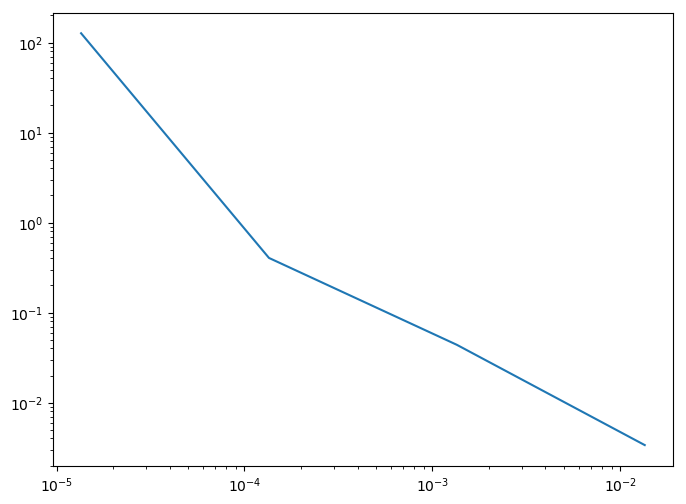

In [13]:
mbins_lower = np.array((3.e-6, 3.e-5, 3.e-4, 3.e-3))
mbins_upper = np.array((3.e-5, 3.e-4, 3.e-3, 3.e-2))

mbins_intervals = mbins_upper - mbins_lower

fbins_indiv = (102./(1.12e4)) * np.array((0.376,0.012,0.013,0.01)) / mbins_intervals

fbins_indiv_univ = 5.e-10 * np.array((0.376,0.012,0.013,0.01)) / mbins_intervals #gonna need to estimate the number of M dwarfs in the universe


#take the average mass in each mass bin
mbins_indiv = mbins_intervals / 2.

#If a sequence of shape 2xN, errorbars are drawn at -row1 and +row2 relative to the data.
fig = plt.figure(figsize=(8,6))
plt.plot(mbins_indiv, fbins_indiv)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [18]:
RVbinsData =np.vstack((mbins_indiv,fbins_indiv)).T
np.savetxt('../data/planetsRVbins_Mdwarfs.txt',RVbinsData,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)')

In [19]:
RVbinsData_univ =np.vstack((mbins_indiv,fbins_indiv_univ)).T
np.savetxt('../data/planetsRVbins_Mdwarfs_univ.txt',RVbinsData_univ,fmt='%1.3e \t',header='M (M_s) \t dN/dMdV (M_s^-1 pc^-3)')